# **Estudo de Previsão de Fraude Com Cartão de Crédito**

https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data

Este conjunto de dados contém transações de cartões de crédito realizadas por portadores de cartões europeus no ano de 2023. Ele compreende mais de 550.000 registros, e os dados foram anonimizados para proteger as identidades dos portadores de cartões. O objetivo principal deste conjunto de dados é facilitar o desenvolvimento de algoritmos e modelos de detecção de fraudes para identificar transações potencialmente fraudulentas.

**Variáveis:**

- id: Um identificador único para cada transação no dataset. É útil para rastrear ou referenciar transações específicas.

- V1-V28: São variáveis numéricas e anonimizadas que representam características das transações. Elas foram transformadas (geralmente usando técnicas como PCA - Análise de Componentes Principais) para preservar a privacidade das informações sensíveis.

- Amount: O valor monetário da transação. Esse atributo pode ajudar na análise de comportamento, como detecção de transações incomuns para determinados usuários.

- Class: Uma variável categórica binária:
0: Indica que a transação não é fraudulenta.
1: Indica que a transação é fraudulenta.

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv('creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.26,-0.47,2.50,-0.08,0.13,0.73,0.52,-0.13,0.73,0.64,-0.99,0.29,-0.94,0.55,1.80,0.22,0.51,0.33,0.12,0.09,-0.11,0.22,-0.13,0.17,0.13,-0.43,-0.08,-0.15,17982.10,0
1,1,0.99,-0.36,0.56,-0.43,0.28,0.43,0.41,-0.13,0.35,0.53,0.14,1.56,0.57,0.63,0.71,0.79,0.40,0.20,-0.34,-0.23,-0.19,-0.61,0.08,-0.58,0.19,0.30,-0.25,-0.06,6531.37,0
2,2,-0.26,-0.95,1.73,-0.46,0.07,1.42,0.74,-0.10,-0.26,0.69,-0.27,0.66,0.81,0.62,3.07,-0.58,0.89,0.24,-2.37,0.36,-0.01,0.70,0.95,-1.15,-0.61,-0.31,-0.30,-0.24,2513.54,0
3,3,-0.15,-0.51,1.75,-1.09,0.25,1.14,0.52,-0.07,-0.21,0.58,-0.75,0.74,0.59,0.56,-0.70,-0.03,0.24,2.18,-1.35,-0.38,-0.15,-0.04,-0.21,-1.89,1.00,-0.52,-0.17,0.05,5384.44,0
4,4,-0.21,-0.17,1.53,-0.45,0.11,0.53,0.66,-0.21,1.05,0.97,-1.20,1.03,1.44,0.24,0.15,0.22,0.37,0.29,0.45,0.25,-0.11,0.73,-0.16,0.31,-0.41,1.07,0.02,0.42,14278.97,0


In [3]:
df.shape

(568630, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Não temos valres nulos ou NaN.

In [7]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00
mean,284314.50,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,12041.96,0.50
std,164149.49,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,6919.64,0.50
min,0.00,-3.50,-49.97,-3.18,-4.95,-9.95,-21.11,-4.35,-10.76,-3.75,-3.16,-5.95,-2.02,-5.96,-2.11,-3.86,-2.21,-2.48,-2.42,-7.80,-78.15,-19.38,-7.73,-30.30,-4.07,-13.61,-8.23,-10.50,-39.04,50.01,0.00
25%,142157.25,-0.57,-0.49,-0.65,-0.66,-0.29,-0.45,-0.28,-0.19,-0.57,-0.59,-0.70,-0.83,-0.70,-0.87,-0.62,-0.72,-0.62,-0.56,-0.57,-0.35,-0.17,-0.49,-0.24,-0.65,-0.55,-0.63,-0.30,-0.23,6054.89,0.00
50%,284314.50,-0.09,-0.14,0.00,-0.07,0.08,0.08,0.23,-0.11,0.09,0.26,-0.04,0.16,0.02,0.23,-0.04,0.13,0.27,0.09,-0.03,-0.12,-0.04,-0.03,-0.06,0.02,-0.01,-0.01,-0.17,-0.01,12030.15,0.50
75%,426471.75,0.83,0.34,0.63,0.71,0.44,0.50,0.53,0.05,0.56,0.59,0.75,0.74,0.69,0.75,0.67,0.66,0.52,0.54,0.56,0.25,0.15,0.46,0.16,0.70,0.55,0.67,0.33,0.41,18036.33,1.00
max,568629.00,2.23,4.36,14.13,3.20,42.72,26.17,217.87,5.96,20.27,31.72,2.51,17.91,7.19,19.17,14.53,46.65,6.99,6.78,3.83,29.87,8.09,12.63,31.71,12.97,14.62,5.62,113.23,77.26,24039.93,1.00


In [8]:
df.groupby('Class').size()

Class
0    284315
1    284315
dtype: int64

In [9]:
# retiraremos a colunn id do nosso df, visto que não utilizaremos.
df = df.drop('id', axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.26,-0.47,2.50,-0.08,0.13,0.73,0.52,-0.13,0.73,0.64,-0.99,0.29,-0.94,0.55,1.80,0.22,0.51,0.33,0.12,0.09,-0.11,0.22,-0.13,0.17,0.13,-0.43,-0.08,-0.15,17982.10,0
1,0.99,-0.36,0.56,-0.43,0.28,0.43,0.41,-0.13,0.35,0.53,0.14,1.56,0.57,0.63,0.71,0.79,0.40,0.20,-0.34,-0.23,-0.19,-0.61,0.08,-0.58,0.19,0.30,-0.25,-0.06,6531.37,0
2,-0.26,-0.95,1.73,-0.46,0.07,1.42,0.74,-0.10,-0.26,0.69,-0.27,0.66,0.81,0.62,3.07,-0.58,0.89,0.24,-2.37,0.36,-0.01,0.70,0.95,-1.15,-0.61,-0.31,-0.30,-0.24,2513.54,0
3,-0.15,-0.51,1.75,-1.09,0.25,1.14,0.52,-0.07,-0.21,0.58,-0.75,0.74,0.59,0.56,-0.70,-0.03,0.24,2.18,-1.35,-0.38,-0.15,-0.04,-0.21,-1.89,1.00,-0.52,-0.17,0.05,5384.44,0
4,-0.21,-0.17,1.53,-0.45,0.11,0.53,0.66,-0.21,1.05,0.97,-1.20,1.03,1.44,0.24,0.15,0.22,0.37,0.29,0.45,0.25,-0.11,0.73,-0.16,0.31,-0.41,1.07,0.02,0.42,14278.97,0


# **Análises Gráficas:**

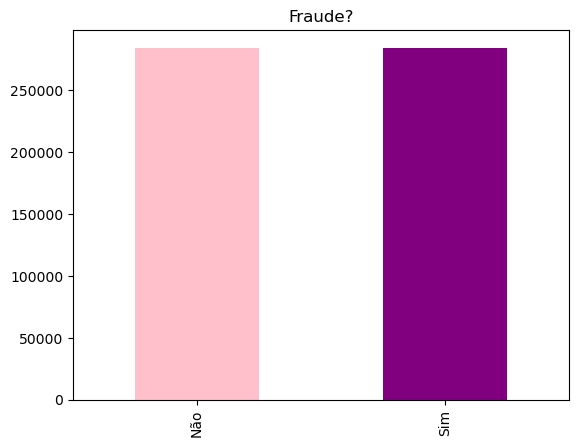

In [10]:
ax = df['Class'].value_counts().plot(kind='bar', title='Fraude?',color = ['pink', 'purple']);
ax.set_xticklabels(['Não', 'Sim'])
plt.show()

Os dados target estão balanceados.

Como possuímos apenas variáveis numéricas (sem definição do que cada uma significa), faremos uma plotagem única das mesmas afim de identificarmos outliers.

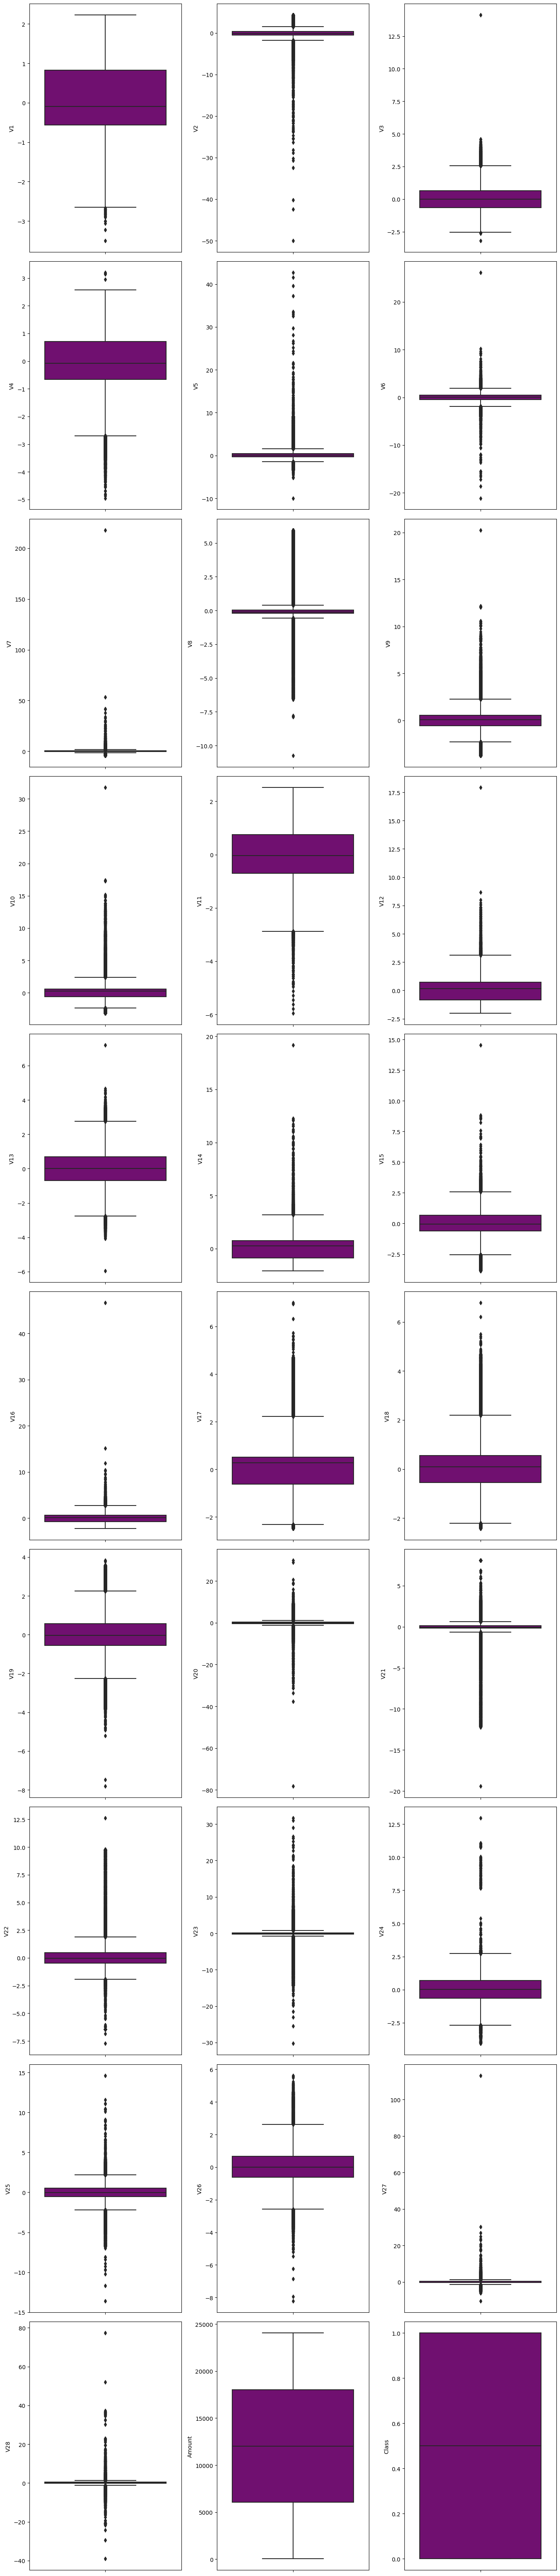

In [11]:
#realizando uma única plotagem automáticamente.
plt.rcParams["figure.figsize"] = [14.00, 64.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(10, 3)
color = 'purple'

line = 0
col = 0
for i in df:
    sns.boxplot(data = df, y=i, ax=axes[line][col], color=color)
    col += 1
    if col == 3:
        line += 1
        col = 0

plt.show()

In [12]:
#tratando os outliers
for feature in df:
    Q1 = df[feature].quantile(q = 0.25)
    Q3 = df[feature].quantile(q = 0.75)
    IQR = Q3-Q1
    low = Q1 - 1.5*IQR
    upp = Q3 + 1.5*IQR
    df[feature] = np.where(df[feature]< low, low, df[feature])
    df[feature] = np.where(df[feature]> upp, upp, df[feature])

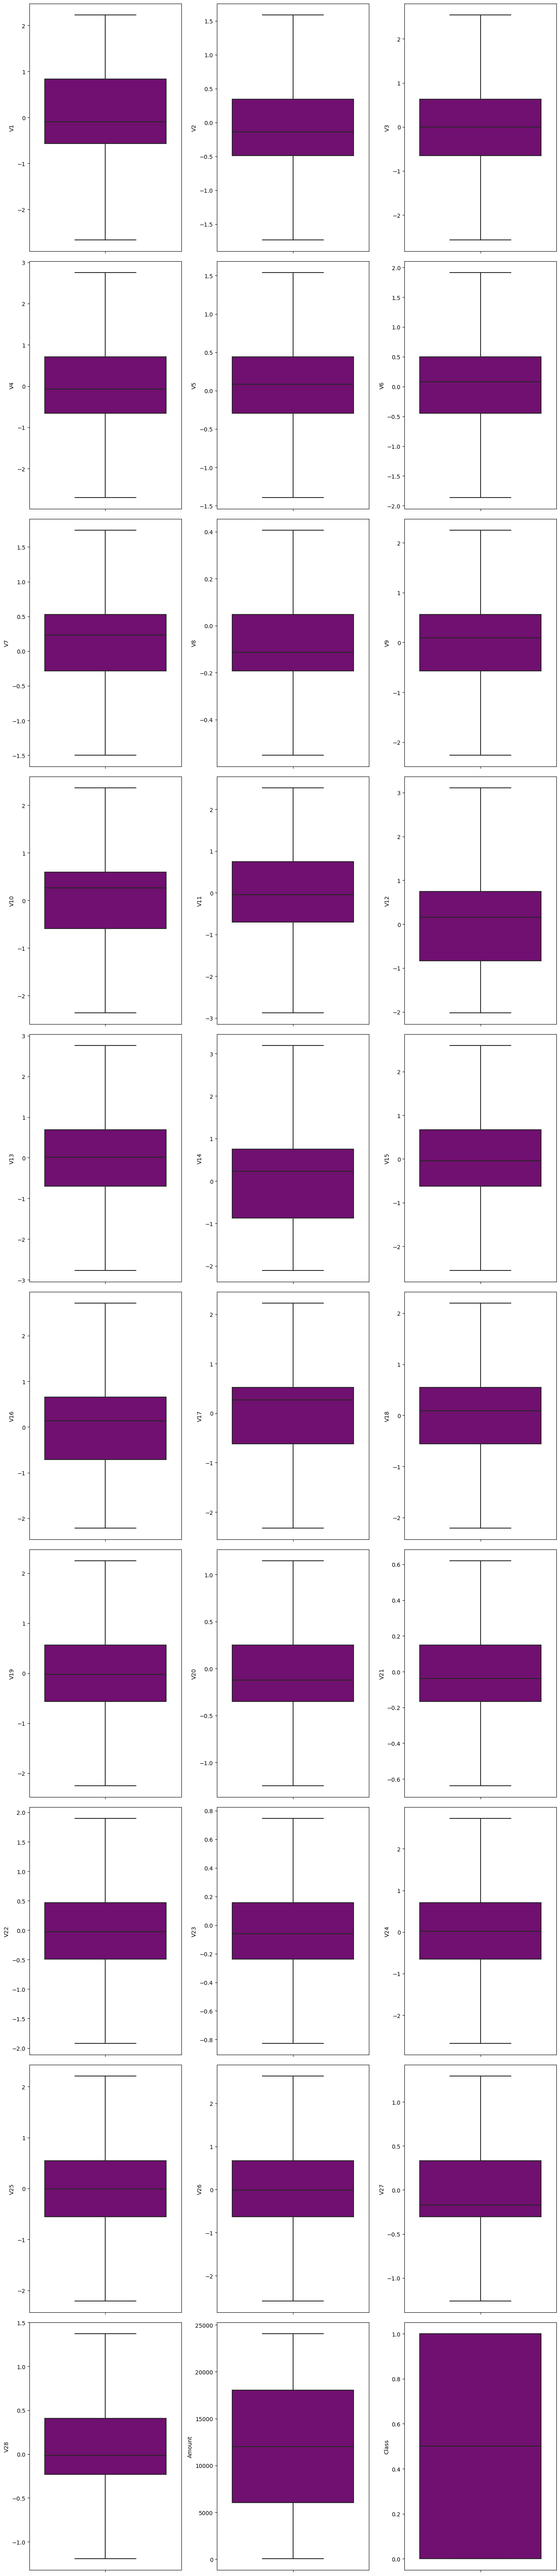

In [13]:
# plot do tratamento realizado
plt.rcParams["figure.figsize"] = [14.00, 64.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(10, 3)
color = 'purple'

line = 0
col = 0
for i in df:
    sns.boxplot(data = df, y=i, ax=axes[line][col], color=color)
    col += 1
    if col == 3:
        line += 1
        col = 0

plt.show()

#  **Ajustando o Modelo:**

Como já sabemos que nossos dados estão balanceados, faremos a normalização e a padronização dos dados afim de deixar todas as variáveis na mesma escala e verificar qual dos dois os algoritmos concedem maior acurácia.

In [14]:
# retiirando a variável target do nosso df e criando um novo df para cada
pred = df.drop('Class', axis=1)
target = df['Class']

In [15]:
# normalização do modelo:
norm = MinMaxScaler().fit(pred)
df_norm = norm.transform(pred)
df_norm

array([[0.49099006, 0.38012785, 0.99040818, ..., 0.46253377, 0.40650304,
        0.74748436],
       [0.74567915, 0.41433613, 0.61121074, ..., 0.3972653 , 0.44022782,
        0.27017014],
       [0.49106697, 0.23566955, 0.8402074 , ..., 0.37683991, 0.3699959 ,
        0.10269021],
       ...,
       [0.4804918 , 0.52031552, 0.52893678, ..., 0.30356663, 0.36063338,
        0.98053016],
       [0.67448481, 0.36587852, 0.44316406, ..., 0.43200124, 0.43565291,
        0.42146118],
       [0.38171399, 0.65200473, 0.37503104, ..., 0.        , 0.74712061,
        0.89387168]])

In [16]:
# criando o df normalizado
df_norm = pd.DataFrame(df_norm, columns=pred.columns)
df_norm.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.49,0.38,0.99,0.48,0.52,0.69,0.62,0.44,0.66,0.63,0.35,0.45,0.33,0.50,0.85,0.49,0.62,0.58,0.53,0.56,0.42,0.56,0.44,0.53,0.53,0.41,0.46,0.41,0.75
1,0.75,0.41,0.61,0.42,0.57,0.61,0.59,0.44,0.58,0.61,0.56,0.70,0.60,0.52,0.63,0.61,0.60,0.55,0.42,0.42,0.35,0.34,0.58,0.39,0.54,0.55,0.40,0.44,0.27
2,0.49,0.24,0.84,0.41,0.50,0.87,0.69,0.48,0.44,0.65,0.48,0.52,0.65,0.51,1.00,0.33,0.71,0.56,0.00,0.67,0.50,0.69,1.00,0.28,0.36,0.44,0.38,0.37,0.10
3,0.51,0.37,0.84,0.30,0.56,0.80,0.62,0.51,0.46,0.62,0.39,0.54,0.61,0.50,0.36,0.44,0.56,1.00,0.20,0.36,0.39,0.49,0.39,0.15,0.73,0.40,0.43,0.48,0.22
4,0.50,0.47,0.80,0.41,0.51,0.63,0.67,0.35,0.73,0.70,0.31,0.59,0.76,0.44,0.53,0.49,0.59,0.57,0.60,0.62,0.42,0.69,0.42,0.55,0.41,0.70,0.50,0.63,0.59


In [17]:
# visualizando as medidas dos dados normalizados
df_norm.describe().round(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00
mean,0.54,0.51,0.50,0.50,0.49,0.49,0.48,0.51,0.50,0.50,0.53,0.39,0.50,0.40,0.50,0.45,0.51,0.50,0.50,0.51,0.52,0.50,0.50,0.50,0.50,0.50,0.49,0.48,0.50
std,0.20,0.22,0.19,0.18,0.24,0.23,0.23,0.25,0.21,0.19,0.19,0.19,0.18,0.19,0.19,0.20,0.20,0.22,0.21,0.24,0.23,0.18,0.24,0.18,0.20,0.19,0.25,0.24,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.43,0.38,0.38,0.38,0.38,0.38,0.37,0.38,0.37,0.38,0.40,0.23,0.37,0.23,0.38,0.30,0.38,0.38,0.37,0.37,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.25
50%,0.53,0.48,0.50,0.48,0.50,0.51,0.53,0.46,0.52,0.56,0.53,0.43,0.50,0.44,0.49,0.48,0.57,0.52,0.49,0.47,0.48,0.50,0.49,0.50,0.50,0.49,0.43,0.46,0.50
75%,0.71,0.62,0.62,0.62,0.62,0.62,0.62,0.62,0.62,0.62,0.67,0.54,0.62,0.54,0.62,0.58,0.62,0.62,0.62,0.62,0.62,0.62,0.62,0.62,0.62,0.62,0.62,0.62,0.75
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [18]:
#padronização do modelo
padr = StandardScaler().fit(pred)
df_padr = padr.transform(pred)
df_padr

array([[-0.26066455, -0.59275684,  2.51947078, ..., -0.1130163 ,
        -0.31533121,  0.85844694],
       [ 0.98511699, -0.43791086,  0.56540998, ..., -0.37909488,
        -0.17724313, -0.79636931],
       [-0.26028835, -1.24665664,  1.74546383, ..., -0.46236265,
        -0.46481181, -1.37701093],
       ...,
       [-0.31201554,  0.04181165,  0.14144003, ..., -0.76107426,
        -0.50314716,  1.66640101],
       [ 0.63687829, -0.65725737, -0.30055953, ..., -0.23748762,
        -0.19597537, -0.27185346],
       [-0.7951755 ,  0.63791134, -0.65165912, ..., -1.99861787,
         1.07934718,  1.3659619 ]])

In [19]:
# criando o df padronizado
df_padr = pd.DataFrame(df_padr, columns=pred.columns)
df_padr.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.26,-0.59,2.52,-0.09,0.14,0.84,0.64,-0.26,0.79,0.71,-0.99,0.30,-0.95,0.56,1.83,0.22,0.59,0.36,0.13,0.20,-0.42,0.32,-0.26,0.17,0.14,-0.44,-0.11,-0.32,0.86
1,0.99,-0.44,0.57,-0.43,0.34,0.49,0.48,-0.28,0.38,0.59,0.14,1.57,0.58,0.64,0.72,0.80,0.47,0.22,-0.36,-0.37,-0.71,-0.86,0.30,-0.58,0.21,0.30,-0.38,-0.18,-0.80
2,-0.26,-1.25,1.75,-0.46,0.06,1.63,0.95,-0.12,-0.28,0.77,-0.27,0.66,0.81,0.63,2.63,-0.58,0.99,0.26,-2.35,0.68,-0.05,1.02,2.03,-1.17,-0.67,-0.32,-0.46,-0.46,-1.38
3,-0.15,-0.65,1.76,-1.10,0.31,1.31,0.64,0.00,-0.22,0.64,-0.75,0.74,0.60,0.57,-0.71,-0.03,0.29,2.29,-1.40,-0.62,-0.54,-0.05,-0.46,-1.91,1.11,-0.53,-0.25,0.00,-0.96
4,-0.21,-0.18,1.54,-0.45,0.10,0.61,0.83,-0.61,1.13,1.07,-1.21,1.04,1.45,0.25,0.16,0.23,0.43,0.32,0.46,0.48,-0.40,1.05,-0.33,0.32,-0.46,1.09,0.05,0.59,0.32


In [20]:
# visualizando as medidas dos dados padronizados
df_padr.describe().round(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00
mean,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.66,-2.31,-2.58,-2.72,-2.01,-2.14,-2.13,-2.01,-2.43,-2.58,-2.88,-2.03,-2.79,-2.13,-2.59,-2.24,-2.51,-2.29,-2.35,-2.16,-2.23,-2.75,-2.06,-2.71,-2.44,-2.64,-2.00,-1.98,-1.73
25%,-0.57,-0.62,-0.65,-0.66,-0.46,-0.52,-0.46,-0.52,-0.61,-0.64,-0.70,-0.83,-0.70,-0.88,-0.63,-0.72,-0.65,-0.57,-0.59,-0.57,-0.61,-0.70,-0.52,-0.66,-0.61,-0.64,-0.47,-0.44,-0.87
50%,-0.09,-0.14,0.00,-0.08,0.07,0.09,0.25,-0.20,0.10,0.30,-0.04,0.16,0.02,0.24,-0.04,0.14,0.32,0.11,-0.03,-0.17,-0.16,-0.03,-0.06,0.02,-0.01,-0.01,-0.26,-0.10,-0.00
75%,0.83,0.52,0.64,0.71,0.57,0.57,0.65,0.47,0.61,0.66,0.75,0.75,0.69,0.76,0.67,0.67,0.59,0.58,0.58,0.48,0.48,0.67,0.50,0.71,0.61,0.68,0.55,0.58,0.87
max,2.23,2.21,2.57,2.77,2.12,2.19,2.31,1.95,2.43,2.61,2.52,3.13,2.78,3.23,2.63,2.75,2.45,2.31,2.34,2.07,2.10,2.73,2.03,2.76,2.45,2.68,2.08,2.11,1.73


# **Iniciando o modelo**

Trabalharemos com o algoritmo Random Forest.

DADOS NORMALIZADOS

In [21]:
X = df_norm
Y = target

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.3, random_state=42)

randomForest = RandomForestClassifier(random_state=42)

# treinando o modelo
inicio = time.time()
randomForest.fit(X_treino, Y_treino)
fim = time.time()

#prevendo o conjunto de teste
Y_pred = randomForest.predict(X_teste)

acuracia_teste = accuracy_score(Y_teste, Y_pred)
print(f"Acurácia no Conjunto de Teste: {acuracia_teste:.2%}")
print(f"Tempo de Treinamento do Modelo: {round(fim - inicio, 2)} segundos")

Acurácia no Conjunto de Teste: 99.99%
Tempo de Treinamento do Modelo: 267.74 segundos


DADOS PADRONIZADOS

In [22]:
X = df_padr
Y = target

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.3, random_state=42)

randomForest = RandomForestClassifier(random_state=42)

# treinando o modelo
randomForest.fit(X_treino, Y_treino)

#prevendo o conjunto de teste
Y_pred = randomForest.predict(X_teste)

acuracia_teste = accuracy_score(Y_teste, Y_pred)
print(f"Acurácia no Conjunto de Teste: {acuracia_teste:.2%}")
print(f"Tempo de Treinamento do Modelo: {round(fim - inicio, 2)} segundos")

Acurácia no Conjunto de Teste: 99.99%
Tempo de Treinamento do Modelo: 267.74 segundos


Ambos os modelos com dados paronizados e normalizados apresentam acurácia de 99.99% com o mesmo tempo de processamento

Como ponto de melhoria, poderia utilizar o GridSearchCV ou o RandomizedSearchCV (mais rápido), par ajustar ou encontrar os melhores parâmetros. 
Tentarei essa execução em um novo projeto ou em uma melhoria deste.